In [534]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# 1) Reading and understanding dataset

In [535]:
# Importing data
Bike=pd.read_csv('day.csv')
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [536]:
# Checking the shape
Bike.shape

(730, 16)

In [537]:
# Checking dataset basic information 
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [538]:
# Checking mathematical information
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [539]:
# Dropping useless or unwanted variables
Bike.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)

In [540]:
# Checking columns
Bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [541]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [542]:
# Checking dtype and null values
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [543]:
# Checking correlation between variables
Bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [544]:
# Checking is there any null values in dataset
Bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<AxesSubplot:xlabel='temp'>

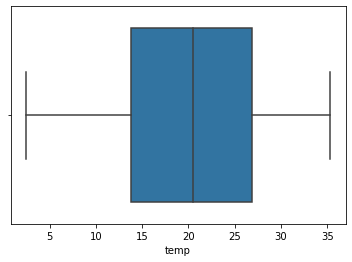

In [545]:
# Plotting continuous varaiables boxplot and also checking outliers
sns.boxplot(Bike['temp'])

<AxesSubplot:xlabel='atemp'>

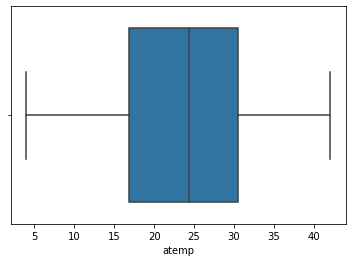

In [546]:
sns.boxplot(Bike['atemp'])

<AxesSubplot:xlabel='windspeed'>

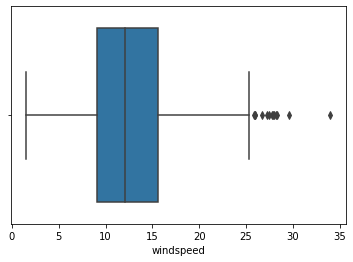

In [547]:
sns.boxplot(Bike['windspeed'])

<AxesSubplot:xlabel='hum'>

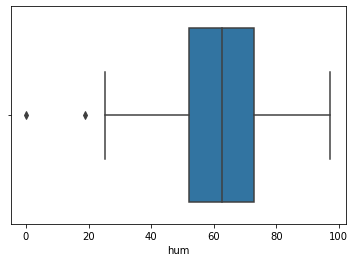

In [548]:
sns.boxplot(Bike['hum'])

<AxesSubplot:xlabel='cnt'>

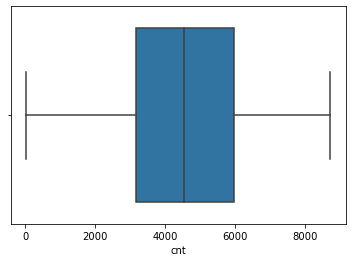

In [549]:
sns.boxplot(Bike['cnt'])

#### Observation : From above boxplots, we can see there are no outliers. 

# 2) Visualizing dataset

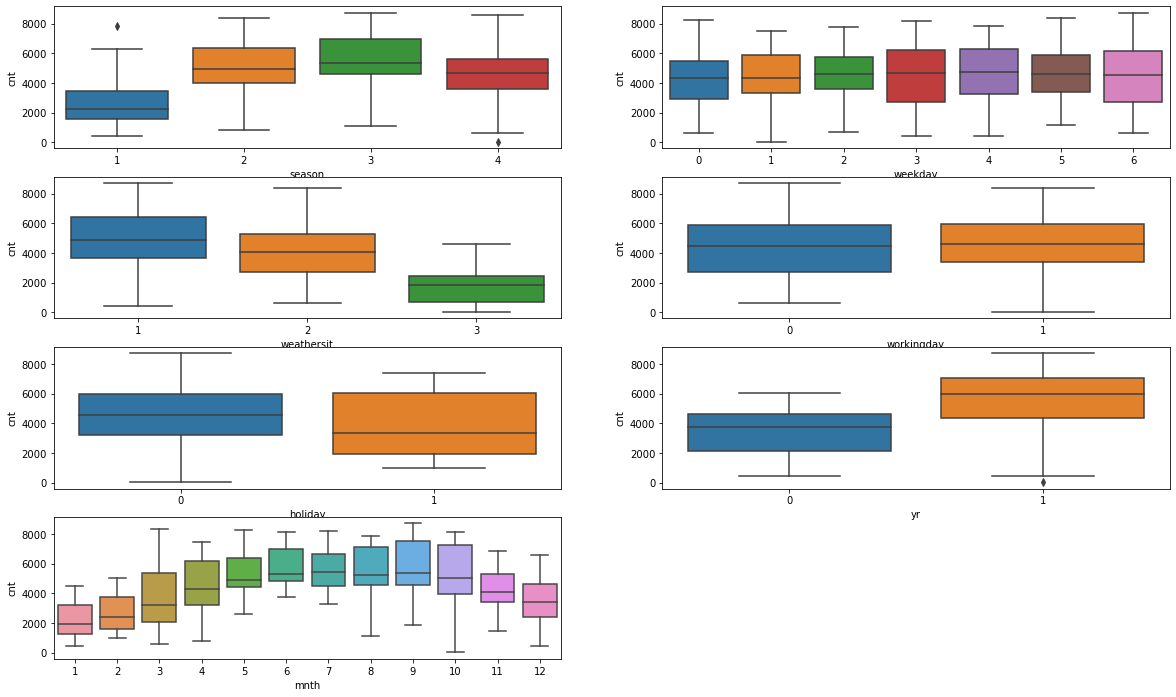

In [550]:
# Analysing categorical variables with target variables
plt.figure(figsize=(20,12))
plt.subplot(4,2,1)
sns.boxplot(x="season",y="cnt",data=Bike)
plt.subplot(4,2,2)
sns.boxplot(x="weekday",y="cnt",data=Bike)
plt.subplot(4,2,3)
sns.boxplot(x="weathersit",y="cnt",data=Bike)
plt.subplot(4,2,4)
sns.boxplot(x="workingday",y="cnt",data=Bike)
plt.subplot(4,2,5)
sns.boxplot(x="holiday",y="cnt",data=Bike)
plt.subplot(4,2,6)
sns.boxplot(x="yr",y="cnt",data=Bike)
plt.subplot(4,2,7)
sns.boxplot(x="mnth",y="cnt",data=Bike)
plt.show()

#### Observation from above boxplot of categorial variables with target variable
#### 1) Clear weather demands for  high rental bikes.
#### 2) Demands for rental bikes had been grown for next year.
#### 3) Season 3 has highest demand for rental bikes.
#### 4) Demand for rental bikes grows continuously till September month, September month has highest demands for rental bikes and after September demand is decreasing.
#### 5) Working day, weekday and holiday is not affecting target variable or not giving any clear information of demands on rental bikes. 


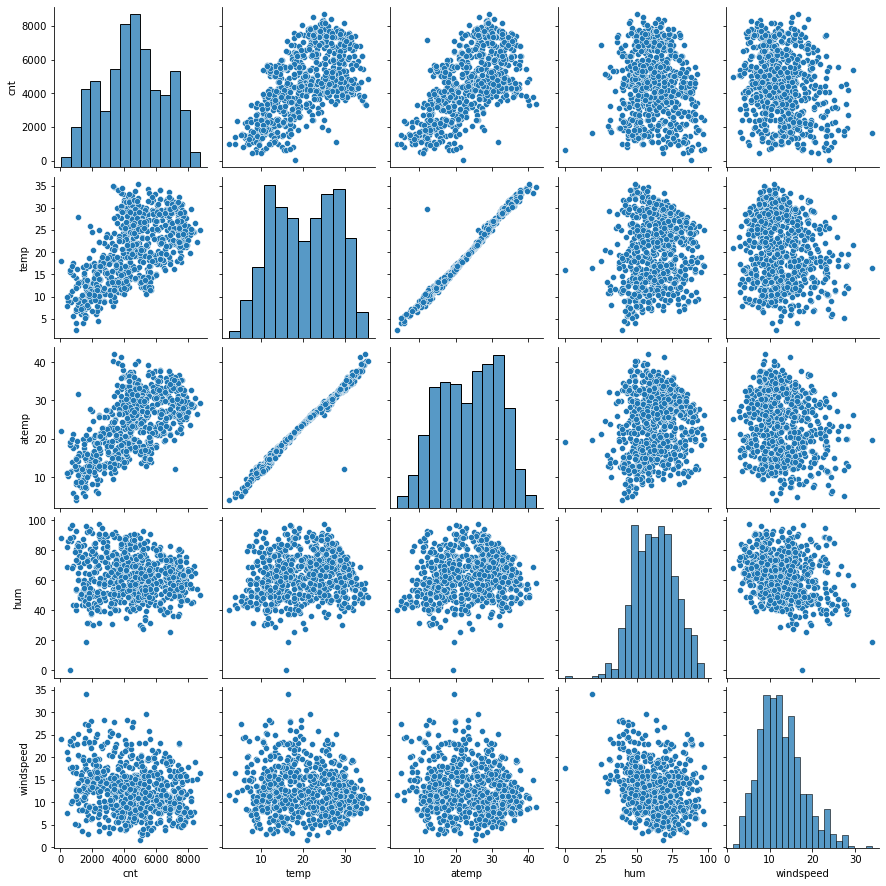

In [551]:
# Pairplot of numerical or continuous variables
sns.pairplot(data=Bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Observations :
#### 1) 'temp' and 'atemp' are highly correlated with each other.
#### 2) 'temp' and 'atemp' are highly correlated with target variable('cnt').

<Figure size 1440x1080 with 0 Axes>

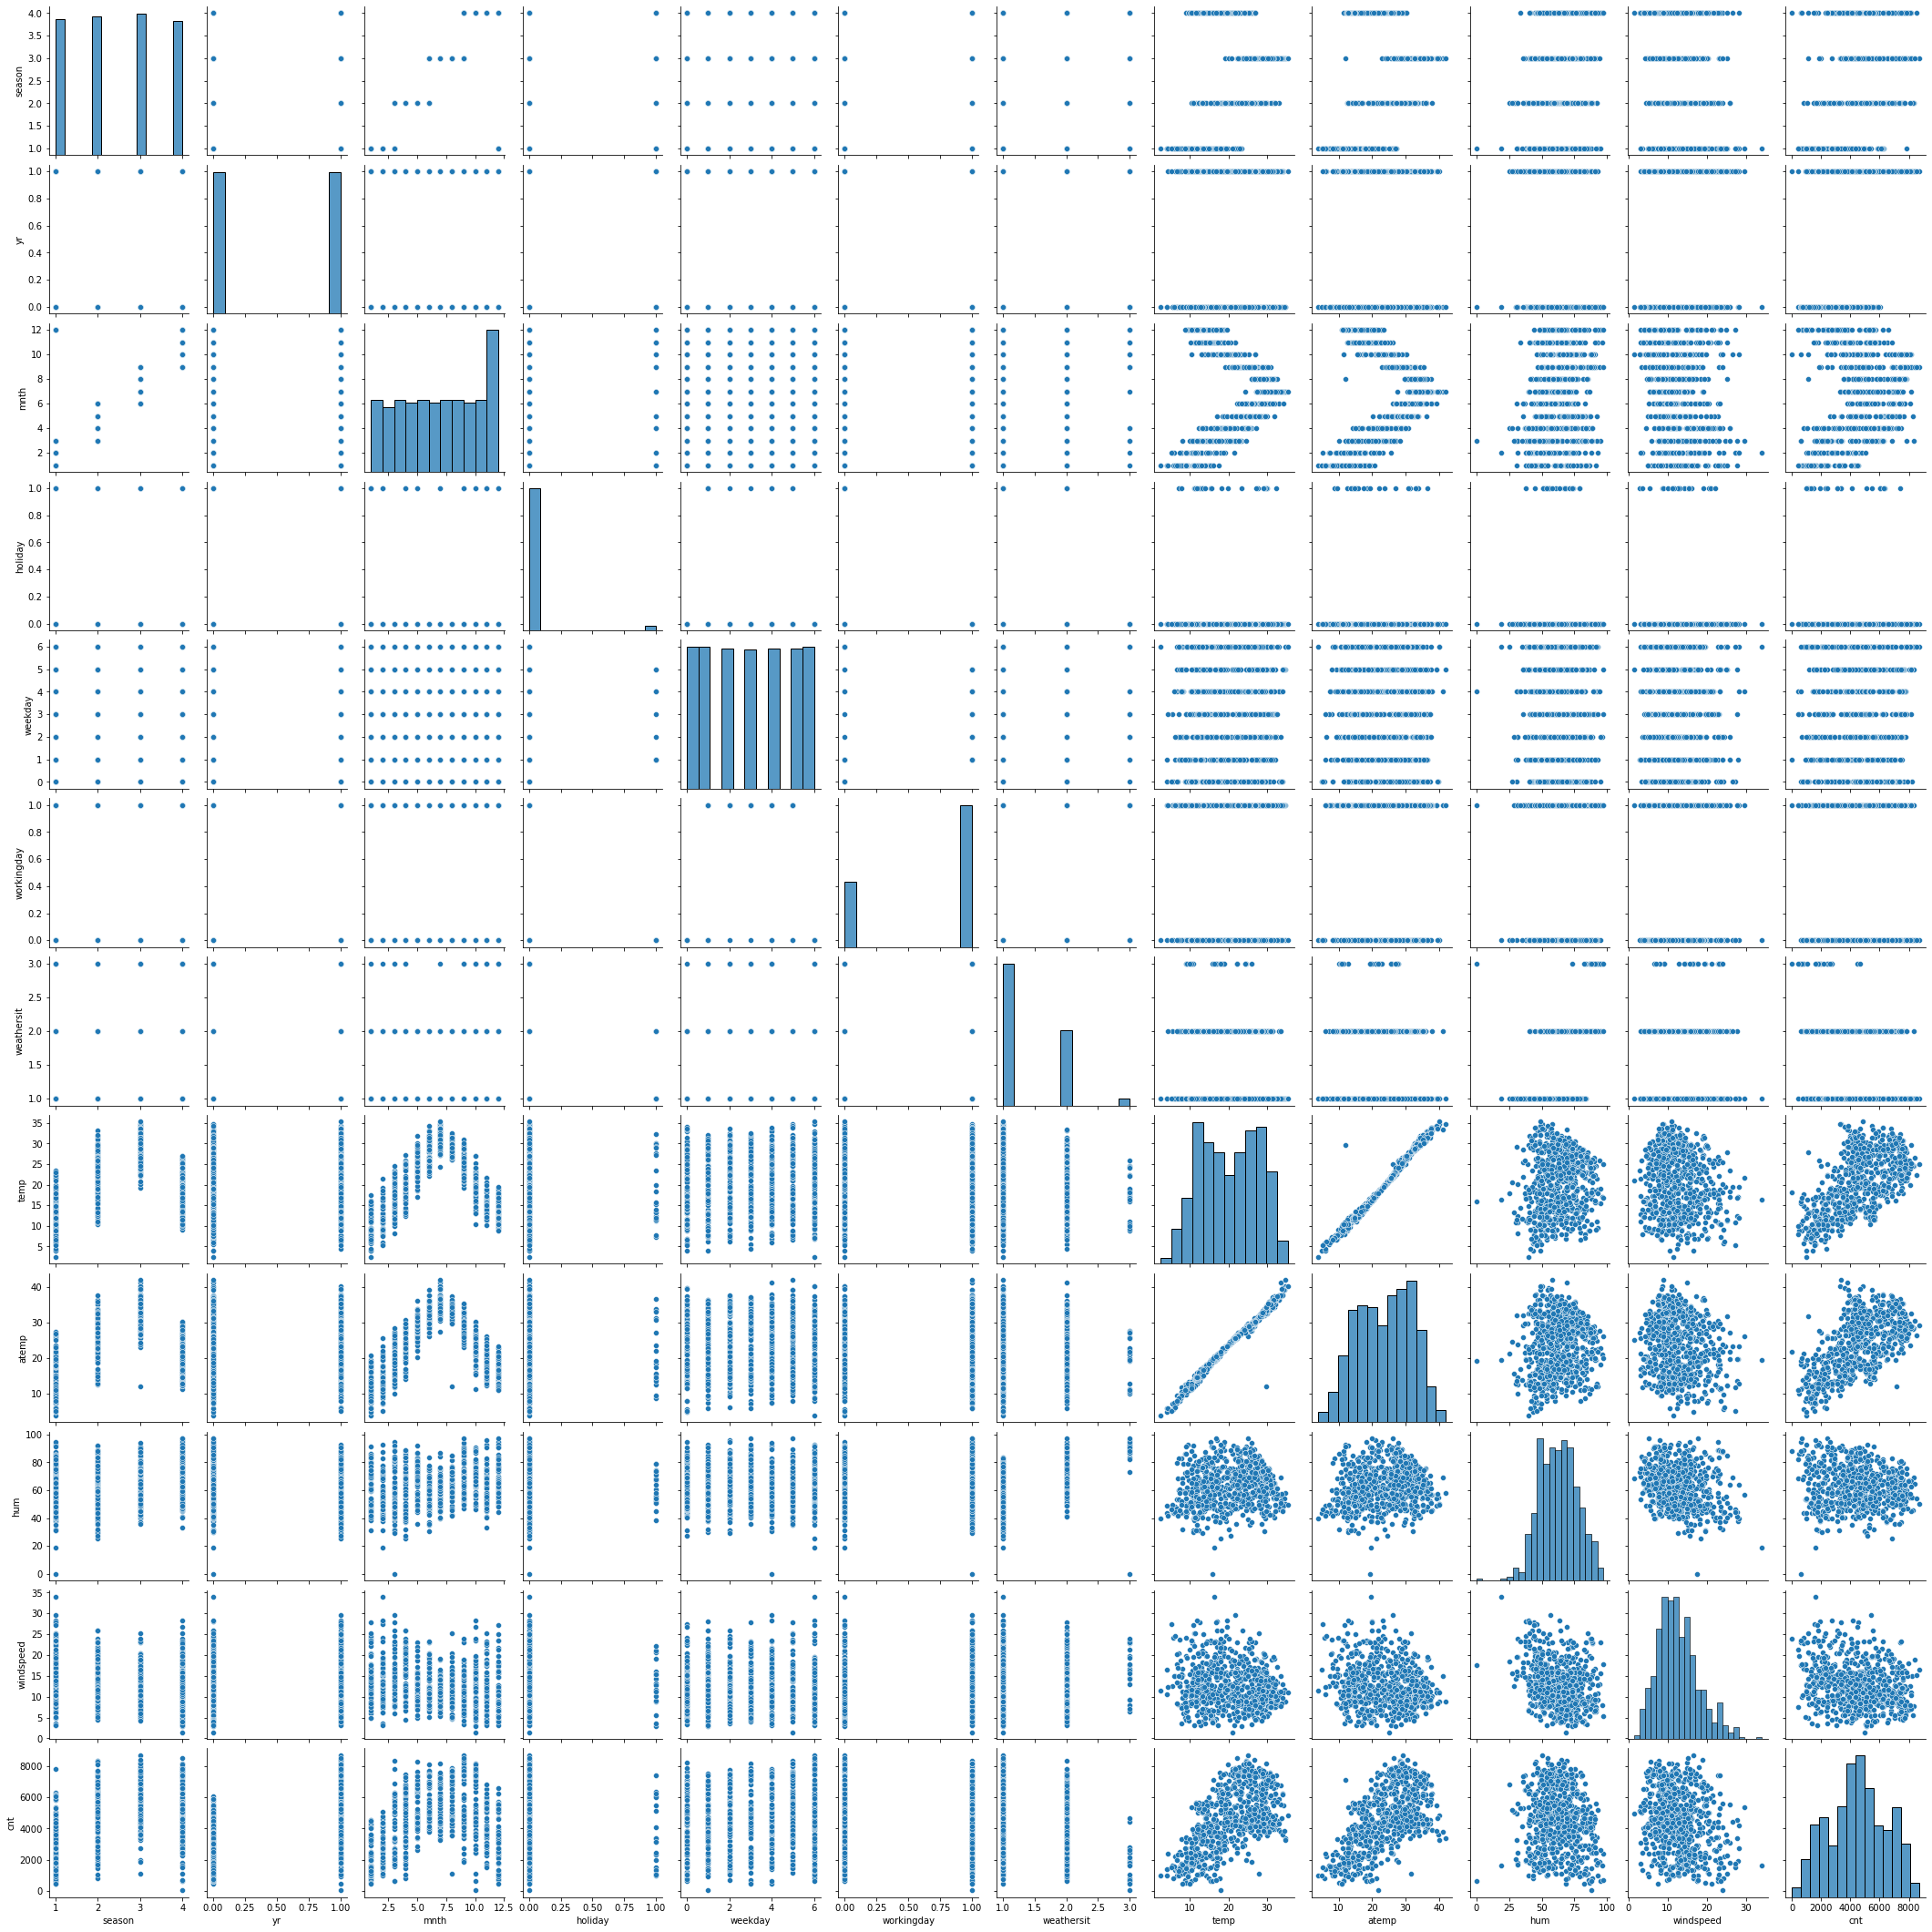

In [552]:
# pairplot of all variables
plt.figure(figsize=(20,15))
sns.pairplot(Bike)
plt.show()

In [553]:
# Checking correlation
Bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


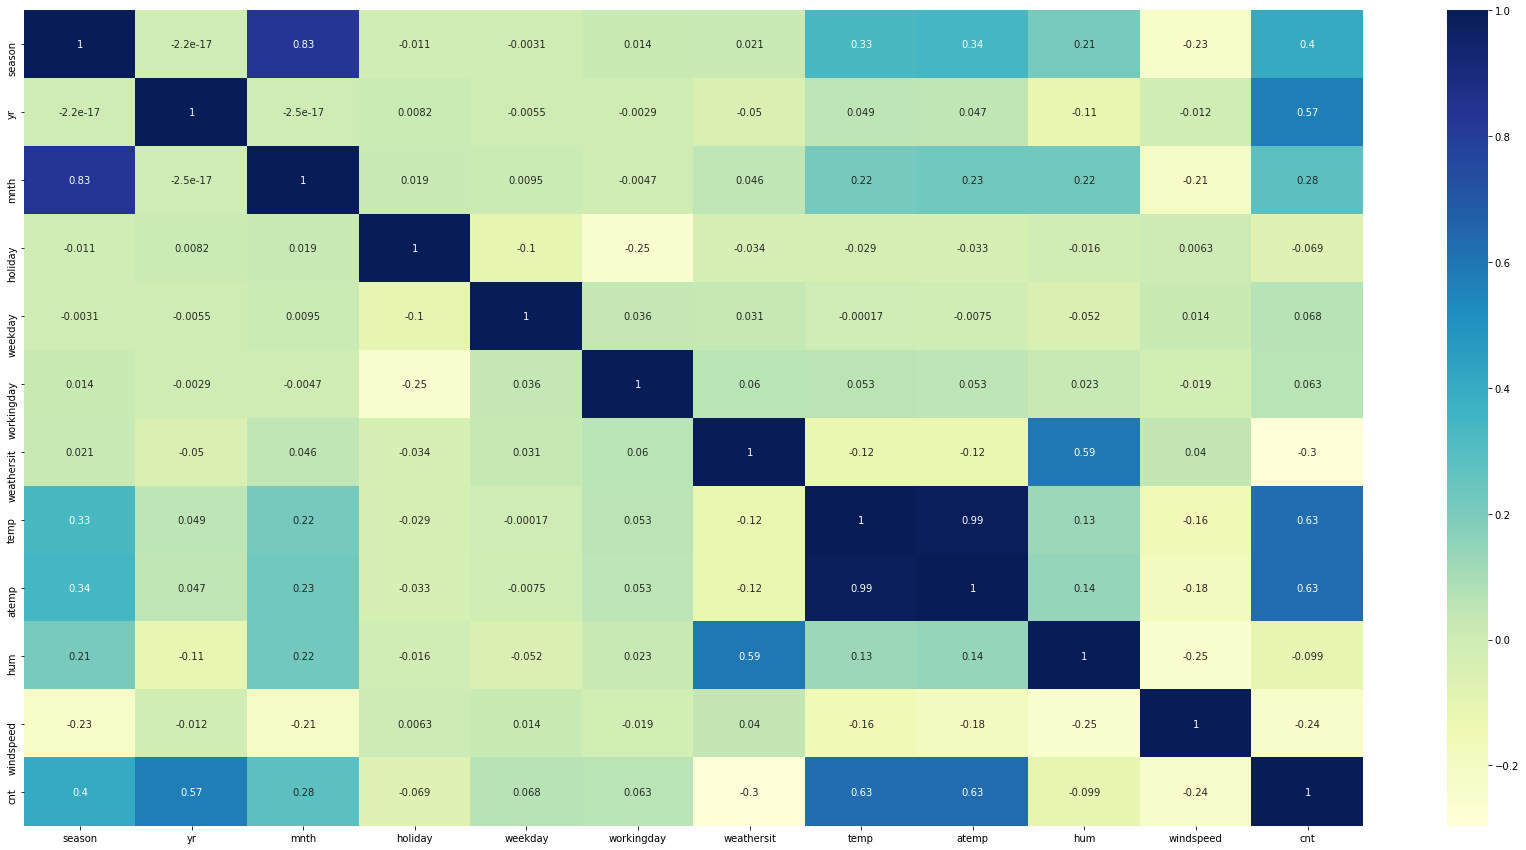

In [554]:
# Viewing correlation
corr = Bike.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

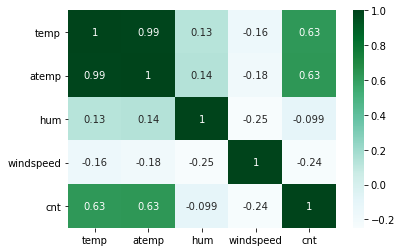

In [555]:
# Checking continuous variable correlation using heatmap
sns.heatmap(Bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Observations :  'temp' and 'atemp' has correlation more than .99 means almost 1 (highly correlated) 

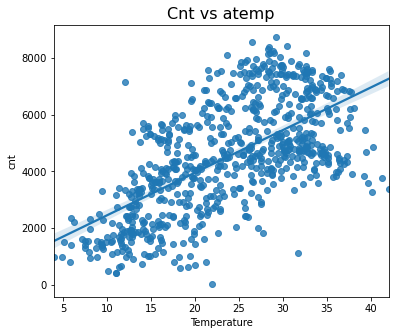

In [556]:
# Regression plot between 'atemp' and target variable('cnt') 
plt.figure(figsize=(6,5))
plt.title("Cnt vs atemp",fontsize=16)
sns.regplot(data=Bike,y="cnt",x="atemp")
plt.xlabel("Temperature")
plt.show()

#### Observations : 'cnt' is linearly increasing with 'atemp' indicating linear relation. Hence demand for bikes is positively correlated to atemp.

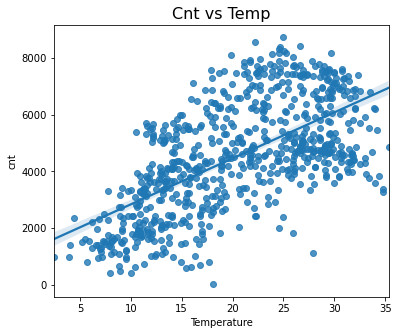

In [557]:
# Regression plot between 'temp' and target variable('cnt') 
plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=Bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Observations : 'cnt' is linearly increasing with 'temp' indicating linear relation. Hence demand for bikes is positively correlated to temp.


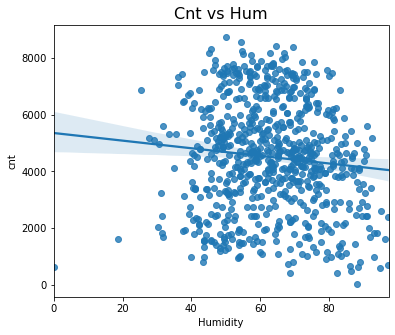

In [558]:
# Regression plot between 'hum' and target variable('cnt') 
plt.figure(figsize=(6,5))
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=Bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Observation : 'cnt' decreasing with increase in humidity. Negative correlation.


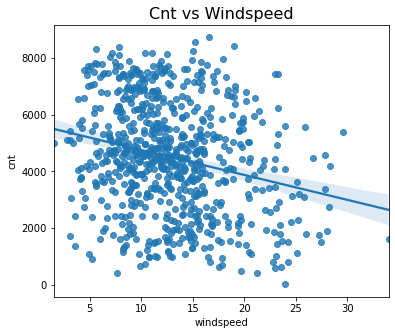

In [559]:
# Regression plot between 'windspeed' and target variable('cnt') 
plt.figure(figsize=(6,5))
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=Bike,y="cnt",x="windspeed")
plt.show()

#### Observations : 'cnt' decreasing with increase in windspeed. Negative correlation.


# 3) Dummy variables

In [560]:
# Creating dummy variables for season 
seasondummy=pd.get_dummies(Bike["season"])
seasondummy

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0


In [561]:
# Rename season variable 
seasondummy.rename(columns={1:'Spring', 2:"Summer",3:"Fall",4:"Winter"},inplace=True)
seasondummy.head()

,Spring,Summer,Fall,Winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [562]:
# concatenate seasondummy variable
Bike=pd.concat([Bike,seasondummy],axis=1)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Fall,Winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


In [563]:
# dropping season var as it now defined by new variables
Bike=Bike.drop('season',axis=1)
Bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Fall,Winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


In [564]:
#  Creating dummy variables for mnth variable
mnthdummy=pd.get_dummies(Bike["mnth"])
mnthdummy.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [565]:
# Rename mnth variable 
mnthdummy.rename(columns = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7: 'Jul', 8:'Aug' , 9:'Sep' , 10:'Oct', 11:'Nov' , 12:'Dec' }, inplace = True)
mnthdummy.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [566]:
# concatenate mnthdummy variable
Bike=pd.concat([Bike,mnthdummy],axis=1)
Bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [567]:
# dropping mnth column as it now defined by new variables
Bike=Bike.drop('mnth',axis=1)
Bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [568]:
# Creating dummy variables for weathersit variable
weathersitdummy=pd.get_dummies(Bike["weathersit"])
weathersitdummy

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [569]:
# Rename weathersit variable 
weathersitdummy.rename(columns={1:'Clear', 2:"Mist",3:"Rain"},inplace=True)
weathersitdummy.head()

,Clear,Mist,Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [570]:
# concatenate weathersitdummy variable
Bike=pd.concat([Bike,weathersitdummy],axis=1)
Bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Mist,Rain
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,1,0,0


In [571]:
# dropping weathersit variable as it now defined by new variables
Bike=Bike.drop('weathersit',axis=1)
Bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Mist,Rain
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [572]:
# Creating dummy variables for weekday variable
weekdaydummy=pd.get_dummies(Bike["weekday"])
weekdaydummy

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
725,0,0,0,0,1,0,0
726,0,0,0,0,0,1,0
727,0,0,0,0,0,0,1
728,1,0,0,0,0,0,0


In [573]:
# Rename weekday variable 
weekdaydummy.rename(columns={0:'Sunday', 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
weekdaydummy.head()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [574]:
# concatenate weekdaydummy variable`
Bike=pd.concat([Bike,weekdaydummy],axis=1)
Bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,...,Clear,Mist,Rain,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,1,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,0,0,0,1,0,0,0


In [575]:
# dropping weekday variable as it now defined by new variables
Bike=Bike.drop('weekday',axis=1)
Bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Clear,Mist,Rain,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,1,0,0,0


In [576]:
Bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Fall', 'Winter', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Clear', 'Mist',
       'Rain', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday'],
      dtype='object')

# 4) Train-Test Split

In [577]:
# Splitting data into train-test set
df_train, df_test = train_test_split(Bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [578]:
# Viewing train shape
df_train.shape

(510, 34)

In [579]:
# Viewing test shape
df_test.shape

(219, 34)

# 5) Rescaling features

In [580]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [581]:
# Rescaling variables
num_var = ['atemp', 'hum', 'windspeed','cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Clear,Mist,Rain,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,1,0,0,0,0,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,1


In [582]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [583]:
# Look on y_train
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [584]:
# Look on X_train
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Fall,...,Clear,Mist,Rain,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0,0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0,0,1,...,1,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,1,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,0,10.489153,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,1,0,0,0,0,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,0.762183,0.605840,0.355596,0,1,0,...,0,1,0,0,1,0,0,0,0,0
578,1,0,1,30.852500,0.824359,0.679690,0.187140,0,0,1,...,1,0,0,0,0,0,0,1,0,0
53,0,0,1,9.091299,0.218747,0.435939,0.111379,1,0,0,...,1,0,0,0,0,0,1,0,0,0
350,0,0,0,10.591653,0.223544,0.577930,0.431816,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# 6) Model Building

In [585]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [586]:
#RFE(Recursive feature elimination)
# Running RFE with the output number of the variable 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [587]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 11),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 12),
 ('Fall', False, 7),
 ('Winter', True, 1),
 ('Jan', False, 2),
 ('Feb', False, 5),
 ('Mar', False, 15),
 ('Apr', False, 16),
 ('May', False, 6),
 ('Jun', False, 17),
 ('Jul', True, 1),
 ('Aug', False, 8),
 ('Sep', True, 1),
 ('Oct', False, 14),
 ('Nov', False, 3),
 ('Dec', False, 4),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Rain', True, 1),
 ('Sunday', True, 1),
 ('Monday', False, 9),
 ('Tuesday', False, 10),
 ('Wednesday', False, 19),
 ('Thursday', False, 18),
 ('Friday', False, 13),
 ('Saturday', True, 1)]

In [588]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Jul', 'Sep', 'Clear', 'Mist', 'Rain', 'Sunday', 'Saturday'],
      dtype='object')

In [589]:
X_train.columns[~rfe.support_]

Index(['temp', 'Summer', 'Fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Aug', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [590]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [591]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [592]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [593]:
# Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.45e-188
Time:                        15:26:44   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1291      0.023      5.655      0.0

In [594]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [595]:
# Dropping 'holiday' variable bcz of its high p-value
X_train_rfe.drop("holiday", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_rfe).fit()
lr_1.params

const         0.103591
yr            0.231694
workingday    0.099656
atemp         0.495005
hum          -0.149859
windspeed    -0.153946
Spring       -0.112985
Winter        0.049678
Jul          -0.073349
Sep           0.061858
Clear         0.136213
Mist          0.076756
Rain         -0.109378
Sunday        0.056327
Saturday      0.109420
dtype: float64

In [596]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.45e-188
Time:                        15:26:44   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1036      0.033      3.152      0.002       0.039       0.168
yr             0.2317      0.008     28.400      0.000       0.216       0.248
workingday     0.0997      0.026      3.855      0.000       0.049       0.150
atemp          0.4950      0.032     15.321      0.000       0.432       0.558
hum           -0.1499      0.038     -3.946      0.000      -0.224      -0.075
windspeed     -0.1539      0.026     -5.986      0.000      -0.204      -0.103
Spring        -0.1130      0.015     -7.650      0.000      -0.142      -0.084
Winter         0.0497      0.012      4.090      0.000       0.026       0.074
Jul           -0.0733      0.017     -4.281      0.000      -0.107      -0.040
Sep            0.0619      0.016      3.983      0.000       0.031       0.092
Clear          0.1362      0.011     12.234      0.000       0.114       0.158
Mist           0.0768      0.013      5.720      0.000       0.050       0.103
Rain          -0.1094      0.023     -4.708      0.000      -0.155      -0.064
Sunday         0.0563      0.027      2.051      0.041       0.002       0.110
Saturday       0.1094      0.027      4.006      0.000       0.056       0.163
==============================================================================
Omnibus:                       61.213   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.594
Skew:                          -0.585   Prob(JB):                     2.46e-37
Kurtosis:                       5.562   Cond. No.                     2.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [597]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Clear,62.30
10,Mist,40.42
1,workingday,9.07
13,Saturday,6.06
12,Sunday,5.74
11,Rain,5.01
2,atemp,2.92
5,Spring,2.49
3,hum,1.90
6,Winter,1.71


In [598]:
# Dropping 'Clear' variable bcz of high VIF
X_train_rfe.drop("Clear", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train, X_train_rfe).fit()
lr_2.params

const         0.239803
yr            0.231694
workingday    0.099656
atemp         0.495005
hum          -0.149859
windspeed    -0.153946
Spring       -0.112985
Winter        0.049678
Jul          -0.073349
Sep           0.061858
Mist         -0.059456
Rain         -0.245591
Sunday        0.056327
Saturday      0.109420
dtype: float64

In [599]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.45e-188
Time:                        15:26:44   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2398      0.040      5.994      0.000       0.161       0.318
yr             0.2317      0.008     28.400      0.000       0.216       0.248
workingday     0.0997      0.026      3.855      0.000       0.049       0.150
atemp          0.4950      0.032     15.321      0.000       0.432       0.558
hum           -0.1499      0.038     -3.946      0.000      -0.224      -0.075
windspeed     -0.1539      0.026     -5.986      0.000      -0.204      -0.103
Spring        -0.1130      0.015     -7.650      0.000      -0.142      -0.084
Winter         0.0497      0.012      4.090      0.000       0.026       0.074
Jul           -0.0733      0.017     -4.281      0.000      -0.107      -0.040
Sep            0.0619      0.016      3.983      0.000       0.031       0.092
Mist          -0.0595      0.011     -5.609      0.000      -0.080      -0.039
Rain          -0.2456      0.027     -9.239      0.000      -0.298      -0.193
Sunday         0.0563      0.027      2.051      0.041       0.002       0.110
Saturday       0.1094      0.027      4.006      0.000       0.056       0.163
==============================================================================
Omnibus:                       61.213   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.594
Skew:                          -0.585   Prob(JB):                     2.46e-37
Kurtosis:                       5.562   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [600]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.41
2,atemp,17.30
1,workingday,17.00
12,Saturday,4.58
4,windspeed,4.48
11,Sunday,4.47
5,Spring,2.74
9,Mist,2.28
0,yr,2.08
6,Winter,2.08


In [601]:
# Dropping 'hum' variable bcz of high VIF
X_train_rfe.drop("hum", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()
lr_3.params

const         0.159285
yr            0.235251
workingday    0.100541
atemp         0.463991
windspeed    -0.126504
Spring       -0.116801
Winter        0.040879
Jul          -0.066158
Sep           0.058613
Mist         -0.083636
Rain         -0.287227
Sunday        0.054309
Saturday      0.111983
dtype: float64

In [602]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.02e-186
Time:                        15:26:44   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1593      0.035      4.562      0.000       0.091       0.228
yr             0.2353      0.008     28.598      0.000       0.219       0.251
workingday     0.1005      0.026      3.834      0.000       0.049       0.152
atemp          0.4640      0.032     14.593      0.000       0.402       0.526
windspeed     -0.1265      0.025     -5.036      0.000      -0.176      -0.077
Spring        -0.1168      0.015     -7.812      0.000      -0.146      -0.087
Winter         0.0409      0.012      3.375      0.001       0.017       0.065
Jul           -0.0662      0.017     -3.827      0.000      -0.100      -0.032
Sep            0.0586      0.016      3.725      0.000       0.028       0.090
Mist          -0.0836      0.009     -9.530      0.000      -0.101      -0.066
Rain          -0.2872      0.025    -11.604      0.000      -0.336      -0.239
Sunday         0.0543      0.028      1.950      0.052      -0.000       0.109
Saturday       0.1120      0.028      4.042      0.000       0.058       0.166
==============================================================================
Omnibus:                       64.510   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.273
Skew:                          -0.632   Prob(JB):                     1.06e-37
Kurtosis:                       5.533   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [603]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.33
2,atemp,12.33
3,windspeed,4.45
11,Saturday,3.81
10,Sunday,3.58
4,Spring,2.40
0,yr,2.07
5,Winter,1.74
8,Mist,1.57
6,Jul,1.36


In [604]:
# Dropping 'Workingday' variable bcz of high VIF 
X_train_rfe.drop('workingday', axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
lr_4.params

const        0.256231
yr           0.235714
atemp        0.466108
windspeed   -0.128407
Spring      -0.119334
Winter       0.037938
Jul         -0.065725
Sep          0.054839
Mist        -0.081758
Rain        -0.282640
Sunday      -0.042301
Saturday     0.015296
dtype: float64

In [605]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.79e-184
Time:                        15:26:44   Log-Likelihood:                 492.38
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     498   BIC:                            -909.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.024     10.502      0.000       0.208       0.304
yr             0.2357      0.008     28.271      0.000       0.219       0.252
atemp          0.4661      0.032     14.465      0.000       0.403       0.529
windspeed     -0.1284      0.025     -5.044      0.000      -0.178      -0.078
Spring        -0.1193      0.015     -7.881      0.000      -0.149      -0.090
Winter         0.0379      0.012      3.096      0.002       0.014       0.062
Jul           -0.0657      0.018     -3.751      0.000      -0.100      -0.031
Sep            0.0548      0.016      3.445      0.001       0.024       0.086
Mist          -0.0818      0.009     -9.205      0.000      -0.099      -0.064
Rain          -0.2826      0.025    -11.278      0.000      -0.332      -0.233
Sunday        -0.0423      0.012     -3.516      0.000      -0.066      -0.019
Saturday       0.0153      0.012      1.316      0.189      -0.008       0.038
==============================================================================
Omnibus:                       78.412   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.005
Skew:                          -0.745   Prob(JB):                     1.68e-48
Kurtosis:                       5.852   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [606]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.63
2,windspeed,3.94
0,yr,2.05
3,Spring,1.65
7,Mist,1.51
4,Winter,1.41
5,Jul,1.35
10,Saturday,1.22
9,Sunday,1.21
6,Sep,1.19


In [607]:
# Dropping 'Saturday' variable bcz of high p-value
X_train_rfe.drop('Saturday', axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train, X_train_rfe).fit()
lr_5.params

const        0.259032
yr           0.235388
atemp        0.465140
windspeed   -0.126941
Spring      -0.119272
Winter       0.038251
Jul         -0.065114
Sep          0.054898
Mist        -0.081726
Rain        -0.282460
Sunday      -0.045095
dtype: float64

In [608]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.63e-185
Time:                        15:26:44   Log-Likelihood:                 491.49
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     499   BIC:                            -914.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2590      0.024     10.650      0.000       0.211       0.307
yr             0.2354      0.008     28.224      0.000       0.219       0.252
atemp          0.4651      0.032     14.428      0.000       0.402       0.528
windspeed     -0.1269      0.025     -4.988      0.000      -0.177      -0.077
Spring        -0.1193      0.015     -7.872      0.000      -0.149      -0.090
Winter         0.0383      0.012      3.120      0.002       0.014       0.062
Jul           -0.0651      0.018     -3.715      0.000      -0.100      -0.031
Sep            0.0549      0.016      3.446      0.001       0.024       0.086
Mist          -0.0817      0.009     -9.194      0.000      -0.099      -0.064
Rain          -0.2825      0.025    -11.263      0.000      -0.332      -0.233
Sunday        -0.0451      0.012     -3.806      0.000      -0.068      -0.022
==============================================================================
Omnibus:                       74.023   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.407
Skew:                          -0.690   Prob(JB):                     1.02e-47
Kurtosis:                       5.878   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [609]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.58
2,windspeed,3.91
0,yr,2.05
3,Spring,1.63
7,Mist,1.51
4,Winter,1.40
5,Jul,1.35
6,Sep,1.19
9,Sunday,1.17
8,Rain,1.08


#### Observation : Now, in our last model i.e: lr_5 all our variables p-value<0.05 and VIF<5. R2 = 0.831 and adj. R2 = 0.827

# 7) Residual analysis on train data

In [610]:
# Residual Analysis
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lr_5.predict(X_train_rfe)

In [611]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

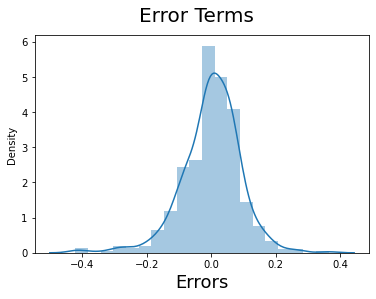

In [612]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                         

#### Observation : Errors are normally distributed with mean 0.

# 8) Making predictions 

In [613]:
#Applying the scaling on test sets
num_vars = ['atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [614]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [615]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train_rfe.drop("const", axis = 1, inplace = True)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [616]:
# Making predictions
y_pred = lr_5.predict(X_test_new)

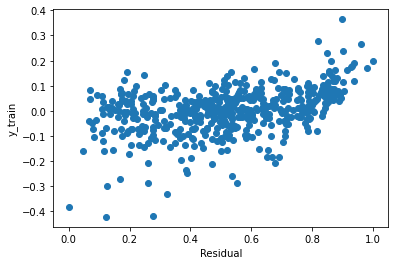

In [617]:
# Scatter plot for linearity check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

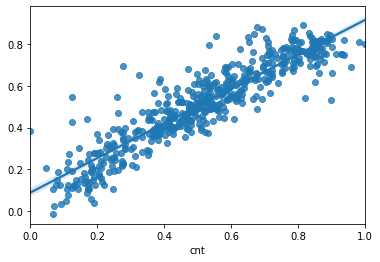

In [618]:
# Regression line on train set
sns.regplot(x= (y_train),y=y_train_pred)
plt.show()

# 9) Model Evaluation

Text(0, 0.5, 'y_pred')

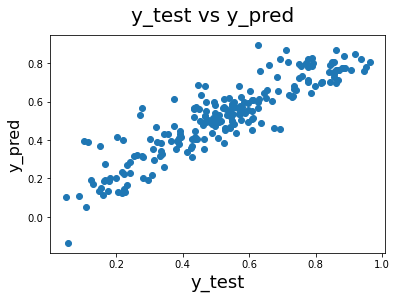

In [619]:
# Model Evaluation 
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

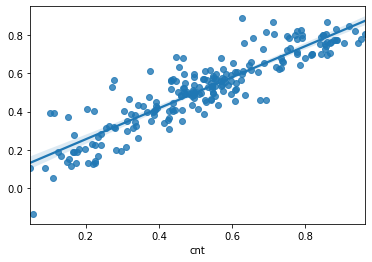

In [620]:
# Regression line on test set
sns.regplot(x= (y_test),y=y_pred)
plt.show()

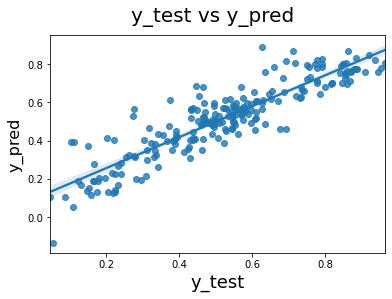

In [621]:
# Visualisation of Resgression line between y_test and y_predict

fig = plt.figure()
sns.regplot(x= (y_test),y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

In [622]:
# Checking R2 on testing data
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
round(r2,3)

0.811

#### R2 on training data = 0.831 (83.1%)
#### R2 on testing data = 0.811 (81.1%)

In [623]:
# Checking Adjusted R2 on testing data
adj_r2 = (1 - (1 - r2) * ((X_test_new.shape[0] - 1) / 
          (X_test_new.shape[0] - X_test_new.shape[1] - 1)))
adj_r2

0.8009250960071239

#### Adjusted R2 on training dataseet = 0.827(82.7%)
#### Adjusted R2 on test dataseet = 0.80(80%)

#### Conclusion on dataset:
#### 1. From scattering diagram we can clearly see that Error is normally distributed.
#### 2. R-Squared value on train dataset is 83.1% and on test datase is 81.1% hence model is working fine on unseen dataset.¶
#### 2. Adjusted R-Squared value on train dataset is 82.7% and on test datase is 80% hence model is working fine on unseen dataset.¶
#### 3. From above point we can conclude that the model is working properly.